In [ ]:
Volatility Calculation
The volatility of a stock is a measurement of the change in variance in the returns of a stock over a specific period of time. 
It is common to compare the volatility of a stockwith another stock to get a feelfor which may have less risk or to a market
index to examine the stock’s volatility in the overall market. Generally, the higher the volatility, the riskier the investmentin that stock, which results in investing in one over another.


In [4]:
import pandas_datareader as pdr
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [5]:
yahooData = pdr.get_data_yahoo('aapl', 
                          start=datetime.datetime(2010, 1, 1), 
                          end=datetime.datetime(2018, 1, 1))

In [6]:
def get(tickers, startdate, enddate):
  def data(ticker):
    return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
  datas = map (data, tickers)
  return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']

all_data = get(tickers, datetime.datetime(2006, 10, 1), datetime.datetime(2012, 1, 1))

# Isolate the `Adj Close` values and transform the DataFrame
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

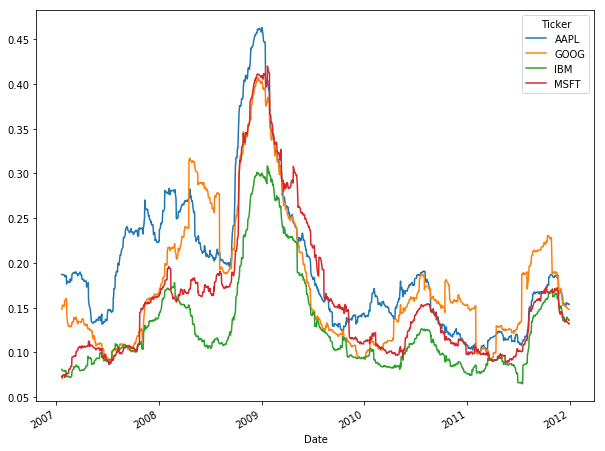

In [11]:
# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()

In [12]:
import statsmodels.api as sm